# Basic Movie Recommendation System
**By: Sameeha Ramadhan**

In this project I will construct a simple recommmendation system using the TMDB 5000 Movie Dataset found on kaggle.com. This system should take in a movie name and ouput a number of suggested movies.

In [14]:
import pandas as pd 
import numpy as np 
credits=pd.read_csv('data/tmdb_5000_credits.csv')
movies=pd.read_csv('data/tmdb_5000_movies.csv')

In [15]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


**The "credits" dataset contains the following features (columns):**

* movie_id: A unique id number for each movie.
* title: the title of the movie
* cast:  The names of the cast members
* crew: The names of the crew members (director, writers, etc.)

**The "movies" dataset has the following features:**

* budget: The movie's production budget
* genres: The movie's genre (i.e. Action, etc.)
* homepage: The official website of the movie
* id: A unique id number for each movie; this matches the movie_id column in the credits dataset
* keywords: The movie's keywords
* original_language: The movie's original language
* original_title:  The movie's title before translation or adaptation
* overview:  A short description of the movie
* popularity: The movie's rating that measures it's popularity
* production_companies: The company that produced the movie
* production_countries:  The country in which the movie was produced
* release_date: The date the movie was released
* revenue: The movie's worldwide profit
* runtime: The movie's length (in minutes)
* status:  The status of the movie, i.e. if it's released or rumored (to be released)
* tagline: The movie's tagline.
* title: The title of the movie; this matches the title column in the credits dataset
* vote_average:  The average ratings the movie recieved.
* vote_count:  The count of the movie's votes

So now that I've identifited the features and decided on what will be particularly useful at the moment, I will join my two datasets on the 'id' column. I will first rename the 'movie_id' column to 'id':

In [17]:
credits.rename(columns={"movie_id":"id"}, inplace=True)

Quick check:

In [18]:
credits.head(2)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [20]:
movies= movies.merge(credits,on='id')

In [21]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


A quick examination of the dataframe shows that the title column was duplicated when merged so I will drop the second (title_y):

In [ ]:
movies.drop(axis=1, columns='title_y')

In [23]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


# Demographic Filtering:

Demographic Filtering offers generalized recommendations based on movie popularity and/or genre. The general pattern of this system is that the more popular and critically acclaimed the movie, the higher chance it has of being preferred by the user. This system recommends the same movies to users with similar demographic features and since each user is unique, this system is far too simple in approach. 

I will demonstrate a basic system using this type of filtering because such a system does have its benefits. So to begin we need to establish a metric to rate the movie, calculate its rating, and then sort and recommend the best rated movie. 

To simply use the average ratings will be biased since a movie with a 9.5 rating with 5 votes can't be fairly compared to a movie with a 8.2 average with 80 votes. 

So after doing some research, I've come across the weighted rating formula IMDB uses to rate their movies. Straight from their website:

*The following formula is used to calculate the Top Rated 250 titles. This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles:*

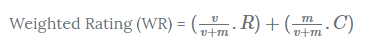

**weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C**

*Where:*

*R = average for the movie (mean) = (rating)*

*v = number of votes for the movie = (votes)*

*m = minimum votes required to be listed in the Top Rated list (currently 25,000)*

*C = the mean vote across the whole report*

So far we have **v** (vote_count) and **R** (vote_average). We can calculate **C** as the following:

In [25]:
C= movies['vote_average'].mean()
print("The mean rating for all of the movies is {} on a scale of 10".format(C))

The mean rating for all of the movies is 6.092171559442016 on a scale of 10


Next, we need to determine an appropriate value for **m**, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.